In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Barents = pd.read_excel(filepath, sheet_name='Barents-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Barents)
fp.date_time(Barents)

Extent       Date
0    1107873.946 1979-01-01
1    1211101.473 1979-02-01
2    1215128.770 1979-03-01
3    1233940.811 1979-04-01
4    1193061.566 1979-05-01
..           ...        ...
533   124025.343 2023-06-01
534    53107.426 2023-07-01
535    11242.827 2023-08-01
536     3272.024 2023-09-01
537    35079.225 2023-10-01

[538 rows x 2 columns]

In [5]:
scaler = MinMaxScaler()
Barents['Extent'] = scaler.fit_transform(Barents['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 9
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Barents['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((518, 12, 1), (518,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Barents_model_LT9/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
52/53 [============================>.] - ETA: 0s - loss: 0.1580 - root_mean_squared_error: 0.3975

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 8s 106ms/step - loss: 0.1606 - root_mean_squared_error: 0.4007 - val_loss: 0.0510 - val_root_mean_squared_error: 0.2259
Epoch 2/50
46/53 [=========================>....] - ETA: 0s - loss: 0.1256 - root_mean_squared_error: 0.3543

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.1193 - root_mean_squared_error: 0.3454 - val_loss: 0.0421 - val_root_mean_squared_error: 0.2052
Epoch 3/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0955 - root_mean_squared_error: 0.3091

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0948 - root_mean_squared_error: 0.3079 - val_loss: 0.0343 - val_root_mean_squared_error: 0.1853
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0784 - root_mean_squared_error: 0.2800

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0759 - root_mean_squared_error: 0.2754 - val_loss: 0.0292 - val_root_mean_squared_error: 0.1710
Epoch 5/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0574 - root_mean_squared_error: 0.2396

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.0573 - root_mean_squared_error: 0.2394 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1608
Epoch 6/50
40/53 [=====================>........] - ETA: 0s - loss: 0.0485 - root_mean_squared_error: 0.2202

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0471 - root_mean_squared_error: 0.2170 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1520
Epoch 7/50
52/53 [============================>.] - ETA: 0s - loss: 0.0341 - root_mean_squared_error: 0.1847

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 4s 79ms/step - loss: 0.0339 - root_mean_squared_error: 0.1840 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1454
Epoch 8/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0299 - root_mean_squared_error: 0.1730

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0292 - root_mean_squared_error: 0.1710 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1373
Epoch 9/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0239 - root_mean_squared_error: 0.1548

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 6s 107ms/step - loss: 0.0243 - root_mean_squared_error: 0.1557 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1308
Epoch 10/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0206 - root_mean_squared_error: 0.1436

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0196 - root_mean_squared_error: 0.1400 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1199
Epoch 11/50
53/53 [==============================] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.1330

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0177 - root_mean_squared_error: 0.1330 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1179
Epoch 12/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0209 - root_mean_squared_error: 0.1446

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0205 - root_mean_squared_error: 0.1432 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1034
Epoch 13/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.1287

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0168 - root_mean_squared_error: 0.1297 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0978
Epoch 14/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0164 - root_mean_squared_error: 0.1282 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1137
Epoch 15/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0178 - root_mean_squared_error: 0.1333

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0176 - root_mean_squared_error: 0.1326 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0957
Epoch 16/50
53/53 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.1213

INFO:tensorflow:Assets written to: Barents_model_LT9\assets


INFO:tensorflow:Assets written to: Barents_model_LT9\assets


53/53 [==============================] - 5s 102ms/step - loss: 0.0147 - root_mean_squared_error: 0.1213 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0927
Epoch 17/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0183 - root_mean_squared_error: 0.1352 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0974
Epoch 18/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0172 - root_mean_squared_error: 0.1313 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0954
Epoch 19/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0142 - root_mean_squared_error: 0.1192 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0975
Epoch 20/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0182 - root_mean_squared_error: 0.1349 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1015
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0096 - val_root_mean_square

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.359572696685791 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

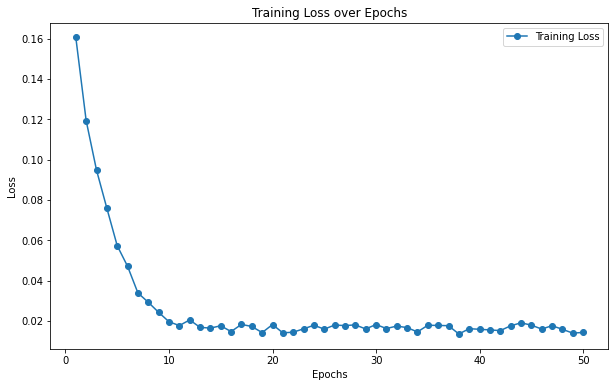

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

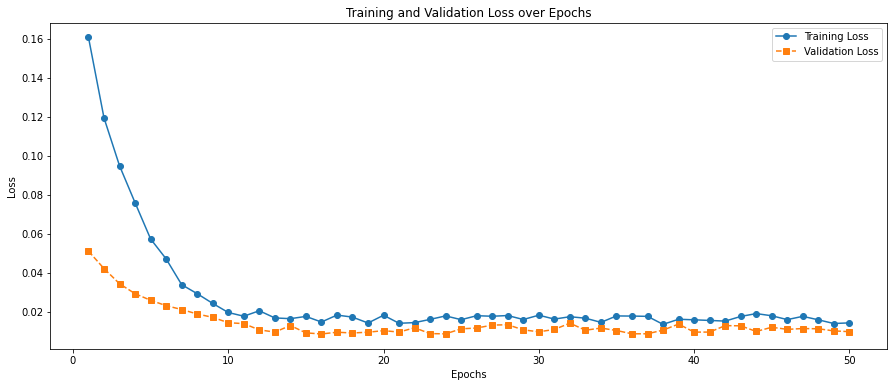

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Barents_model_LT9/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.08800976921008016
MAE : 0.0718530334789531


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

Train Predictions  Actual Extent
0       456647.906250     605897.837
1       553877.812500     654073.790
2       599509.250000     701143.910
3       538214.937500     657891.340
4       447839.750000     432215.421
5       287301.875000     201834.787
6       109922.890625      55041.511
7         8582.732422       5387.468
8        -6378.068359       1576.813
9        79008.429688      21681.895
10      225426.953125      37772.681
11      415158.500000     239568.531
12      493979.062500     427703.330
13      596369.437500     753043.012
14      606955.625000     764554.603
15      524272.250000     563799.961
16      398000.531250     444109.886
17      185696.578125     189669.492
18       10143.174805      63664.521
19      -73135.726562       5984.539
20      -92178.031250       1192.062
21      -37639.386719      25987.740
22      105131.898438     227374.130
23      332940.781250     498316.637
24      516401.687500     666292.874
25      611921.937500     673348.837
26      643785.687500     635756.948
27      550615.062500     673503.693
28      440568.937500     550922.786
29      236737.500000     116554.569
30       61676.328125      12012.356
31      -34758.035156       5446.433
32      -49578.605469       2183.701
33       73948.765625      31883.576
34      269867.500000      98802.296
35      439233.781250     224779.107
36      528088.437500     287476.263
37      606853.812500     376683.928
38      622875.750000     571055.966
39      576659.125000     581039.946
40      413161.468750     376525.530
41      151901.703125     124025.343
42       11883.527344      53107.426
43      -79376.953125      11242.827
44      -55617.503906       3272.024
45       -9368.531250      35079.225

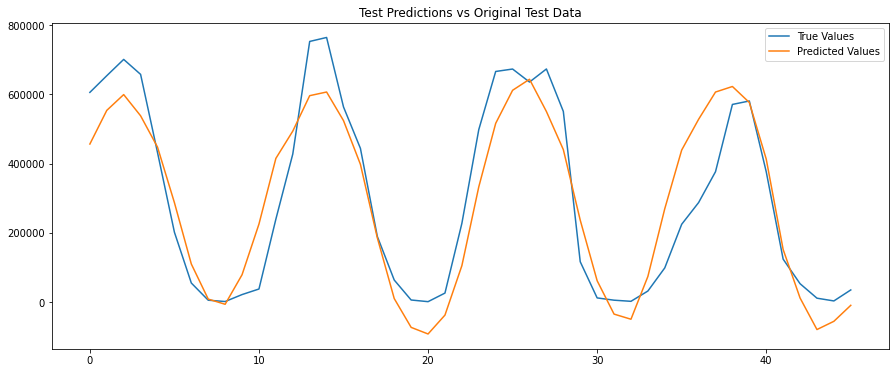

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

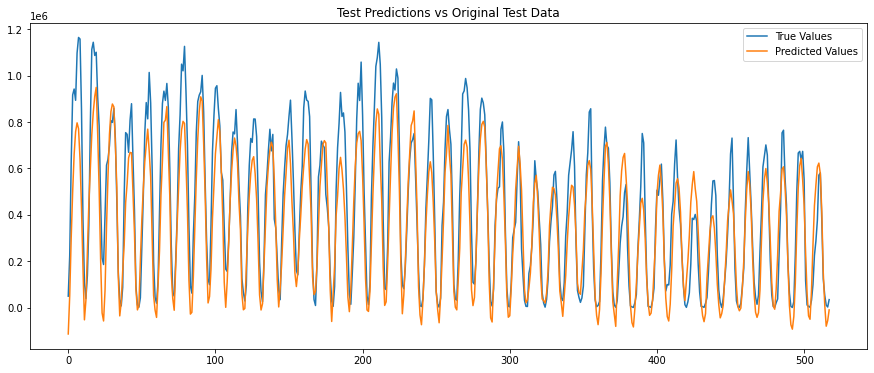

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()